# Model training

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from scipy import stats

# Load the CSV file
data = pd.read_csv("BC-Data-Set.csv")

In [2]:
# Convert the date column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Remove any missing values
data = data.dropna()

# Set the date column as the index of the DataFrame
data = data.set_index('date')

In [3]:
seed = 42

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, data.BC, test_size=0.15, random_state=seed, shuffle=True)
x_train = x_train.drop(columns=['BC'])
x_test = x_test.drop(columns=['BC'])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=seed, shuffle=True)

In [5]:
from sklearn.preprocessing import StandardScaler

## Random Forrest

In [6]:
# TODO: tune max_depth, n_estimators?

In [14]:
for max_depth in [2, 3, 4, 5, 7, 20]:
    for n_estimators in [50, 100, 200, 500]:
        clf = ExtraTreesRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
        scaler = StandardScaler()

        scaler.fit_transform(x_train)

        clf.fit(scaler.fit_transform(x_train), y_train)
        r2 = clf.score(scaler.transform(x_val), y_val)
        y_hat = clf.predict(scaler.transform(x_val))
        rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
        print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')

max_depth=2, n_estimators=50, r2=0.40859020831631543, rmse=0.9621573425414366
max_depth=2, n_estimators=100, r2=0.4198288587984397, rmse=0.9529714817731627
max_depth=2, n_estimators=200, r2=0.42060636812628294, rmse=0.9523327110967679
max_depth=2, n_estimators=500, r2=0.41918619337373053, rmse=0.9534991470338141
max_depth=3, n_estimators=50, r2=0.5264543103355088, rmse=0.8609596280473768
max_depth=3, n_estimators=100, r2=0.5383240218859595, rmse=0.8501009120257211
max_depth=3, n_estimators=200, r2=0.5465458508021868, rmse=0.8424973299835415
max_depth=3, n_estimators=500, r2=0.545674088854252, rmse=0.8433067882901357
max_depth=4, n_estimators=50, r2=0.6239502180797409, rmse=0.7672281230743938
max_depth=4, n_estimators=100, r2=0.6236093346266407, rmse=0.7675757846631802
max_depth=4, n_estimators=200, r2=0.6219407154218413, rmse=0.7692753158232053
max_depth=4, n_estimators=500, r2=0.6237397588088724, rmse=0.7674427857246882
max_depth=5, n_estimators=50, r2=0.6875866348814439, rmse=0.69930

In [17]:
for max_depth in [2, 3, 4, 5, 7, 20]:
    for n_estimators in [50, 100, 200, 500]:
        clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
        scaler = StandardScaler()

        scaler.fit_transform(x_train)

        clf.fit(scaler.fit_transform(x_train), y_train)
        r2 = clf.score(scaler.transform(x_val), y_val)
        y_hat = clf.predict(scaler.transform(x_val))
        rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
        print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')

max_depth=2, n_estimators=50, r2=0.47475093584518757, rmse=0.9067435746424548
max_depth=2, n_estimators=100, r2=0.4814574702210995, rmse=0.9009361933136755
max_depth=2, n_estimators=200, r2=0.4765157975106761, rmse=0.9052189422353736
max_depth=2, n_estimators=500, r2=0.4833051886782086, rmse=0.8993296114834504
max_depth=3, n_estimators=50, r2=0.6214781166574186, rmse=0.7697458200946725
max_depth=3, n_estimators=100, r2=0.6284941795460105, rmse=0.7625786713730348
max_depth=3, n_estimators=200, r2=0.6212958696580739, rmse=0.7699311026246689
max_depth=3, n_estimators=500, r2=0.6265923668516082, rmse=0.7645280761775678
max_depth=4, n_estimators=50, r2=0.6718152917496625, rmse=0.7167389625835567
max_depth=4, n_estimators=100, r2=0.684416913688264, rmse=0.7028436131600159
max_depth=4, n_estimators=200, r2=0.6845917019967698, rmse=0.7026489483212731
max_depth=4, n_estimators=500, r2=0.6912608299060028, rmse=0.6951807045718383
max_depth=5, n_estimators=50, r2=0.7107817834276149, rmse=0.6728444

In [18]:
n_estimators = 100
res = []
for max_depth in range(2, 21):
    clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
    scaler = StandardScaler()

    scaler.fit_transform(x_train)

    clf.fit(scaler.fit_transform(x_train), y_train)
    r2 = clf.score(scaler.transform(x_val), y_val)
    y_hat = clf.predict(scaler.transform(x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')
    res.append(rmse)

max_depth=2, n_estimators=100, r2=0.4814574702210995, rmse=0.9009361933136755
max_depth=3, n_estimators=100, r2=0.6284941795460105, rmse=0.7625786713730348
max_depth=4, n_estimators=100, r2=0.684416913688264, rmse=0.7028436131600159
max_depth=5, n_estimators=100, r2=0.7180162677717522, rmse=0.6643759002067249
max_depth=6, n_estimators=100, r2=0.7431444453810805, rmse=0.6340833129835743
max_depth=7, n_estimators=100, r2=0.7595345206699159, rmse=0.6135192764232275
max_depth=8, n_estimators=100, r2=0.7646311556584382, rmse=0.6069827244017877
max_depth=9, n_estimators=100, r2=0.7774954851629102, rmse=0.5901620200139868
max_depth=10, n_estimators=100, r2=0.7778492583081059, rmse=0.5896926665505288
max_depth=11, n_estimators=100, r2=0.7806659480418452, rmse=0.5859423304432606
max_depth=12, n_estimators=100, r2=0.7788660700439389, rmse=0.5883415701903593
max_depth=13, n_estimators=100, r2=0.783773364139656, rmse=0.5817768540054152
max_depth=14, n_estimators=100, r2=0.7753089247456635, rmse=0.

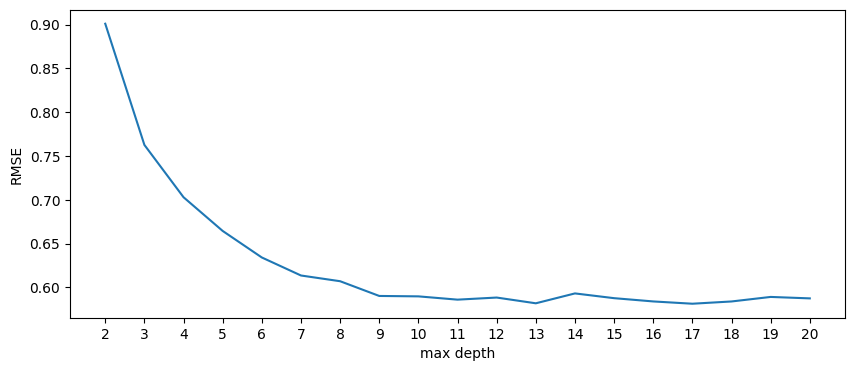

In [29]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(range(2,21), res)
plt.xlabel("max depth")
plt.ylabel("RMSE")
plt.xticks(range(2, 21), range(2, 21))
plt.show()

In [32]:
n_estimators = 100
max_depth = 7
clf = RandomForestRegressor(random_state=seed, max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()

scaler.fit_transform(x_train)

clf.fit(scaler.fit_transform(x_train), y_train)
r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
print(f'{max_depth=}, {n_estimators=}, {r2=}, {rmse=}')

max_depth=7, n_estimators=100, r2=0.7595345206699159, rmse=0.6135192764232275


## SVM

In [42]:
from sklearn.svm import SVR

In [43]:
# basic default just for fun
clf = SVR(kernel='rbf' )
scaler = StandardScaler()

scaler.fit_transform(x_train)
clf.fit(scaler.fit_transform(x_train), y_train)
r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
r2, rmse

(0.7076857617858519, 0.6764361795167784)

In [44]:
res = []
for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    for gamma in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
        clf = SVR(kernel='rbf', gamma=gamma, C=C)
        scaler = StandardScaler()
        scaler.fit_transform(x_train)
        clf.fit(scaler.fit_transform(x_train), y_train)
        r2 = clf.score(scaler.transform(x_val), y_val)
        y_hat = clf.predict(scaler.transform(x_val))
        rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
        print(f'{C=}, {gamma=}, {r2=}, {rmse=}')
        res.append({
            'C': C,
            'gamma': gamma,
            'R2': r2,
            'RMSE': rmse,
        })

C=0.001, gamma=0.001, r2=-0.048256746073391366, rmse=1.2809603176559399
C=0.001, gamma=0.004641588833612777, r2=-0.013157557954555532, rmse=1.2593322851529487
C=0.001, gamma=0.021544346900318832, r2=0.040529287305925865, rmse=1.2255123846735791
C=0.001, gamma=0.1, r2=0.025670377816874645, rmse=1.2349654176346367
C=0.001, gamma=0.46415888336127775, r2=-0.03647454678758821, rmse=1.2737411039064834
C=0.001, gamma=2.154434690031882, r2=-0.05896710886512535, rmse=1.2874876705444787
C=0.001, gamma=10.0, r2=-0.060806330431924405, rmse=1.2886052443500162
C=0.001, gamma=46.41588833612773, r2=-0.060808934847699225, rmse=1.2886068261947272
C=0.001, gamma=215.44346900318823, r2=-0.06081008339500893, rmse=1.288607523787599
C=0.001, gamma=1000.0, r2=-0.06081030280055222, rmse=1.2886076570478422
C=0.004641588833612777, gamma=0.001, r2=-0.0033616367490478805, rmse=1.253229441705253
C=0.004641588833612777, gamma=0.004641588833612777, r2=0.10976723461367399, rmse=1.180466400856244
C=0.004641588833612777

In [58]:
heatmap_data = pd.DataFrame(res).pivot(index='C', columns='gamma', values='RMSE')
heatmap_data

gamma,0.001000,0.004642,0.021544,0.100000,0.464159,2.154435,10.000000,46.415888,215.443469,1000.000000
C,,,,,,,,,,
0.001000,1.280960,1.259332,1.225512,1.234965,1.273741,1.287488,1.288605,1.288607,1.288608,1.288608
0.004642,1.253229,1.180466,1.111724,1.150224,1.240411,1.283715,1.288438,1.288679,1.288697,1.288697
0.021544,1.160974,1.036407,0.981367,1.042460,1.177232,1.269691,1.286932,1.288346,1.288381,1.288383
0.100000,1.012497,0.913883,0.829385,0.909799,1.089692,1.232458,1.280081,1.286250,1.286752,1.286767
0.464159,0.904671,0.800445,0.697214,0.767048,0.976421,1.170579,1.253108,1.271708,1.273931,1.274012
2.154435,0.835129,0.692347,0.602580,0.656480,0.869238,1.097260,1.217499,1.247547,1.251186,1.251357
10.000000,0.755020,0.627488,0.557506,0.602980,0.858310,1.078658,1.214306,1.248095,1.252109,1.252287
46.415888,0.671501,0.593372,0.536966,0.575452,0.867007,1.078584,1.214300,1.248113,1.252130,1.252307
215.443469,0.619097,0.574749,0.566389,0.617761,0.880102,1.078584,1.214300,1.248113,1.252130,1.252307


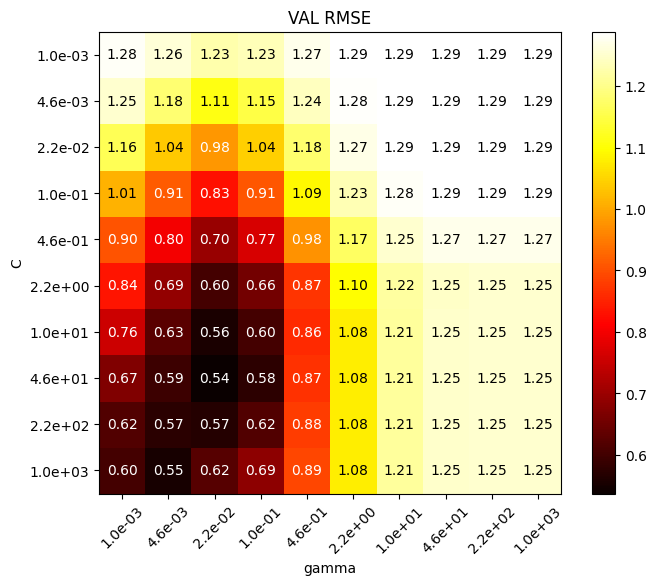

In [89]:
p_range = np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True)
p_range_str = [f'{p:.1e}' for p in p_range]

fig, ax = plt.subplots(figsize=(8,6))

heatmap = ax.imshow(
    heatmap_data,
    interpolation="nearest",
    cmap=plt.cm.hot,
)

data = heatmap_data.values
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        c = 'black' if data[i, j] >= 1 else 'white'
        ax.text(j, i, f'{data[i, j]:.2f}', ha='center', va='center', color=c, fontsize=10)


ax.set_xlabel("gamma")
ax.set_ylabel("C")
plt.colorbar(heatmap, ax=ax)
ax.set_xticks(np.arange(len(p_range)), p_range_str, rotation=45)
ax.set_yticks(np.arange(len(p_range)), p_range_str)
plt.title("VAL RMSE")
plt.show()


In [93]:
df = pd.DataFrame(res)
df.iloc[df.RMSE.argmin()]

C        46.415888
gamma     0.021544
R2        0.815800
RMSE      0.536966
Name: 72, dtype: float64

In [95]:
C, gamma = (46.41588833612773, 0.021544346900318832)
R2_best = 0.815800
RMSE_best = 0.536966

# Subset selection / regularization

In [26]:
# TODO: try different column combinations, also tune parameters after dropping

In [112]:
clf = SVR(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()

cols_to_drop = [
    *[c for c in list(x_train.columns.values)],
    ['TEMP', 'SO2'],
]

for cols in cols_to_drop:
    _x_train = x_train.drop(columns=cols) 
    _x_val = x_val.drop(columns=cols)

    scaler.fit_transform(_x_train)

    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'dropping {cols}, {r2=}, {rmse=}')

dropping N_CPC, r2=0.480859824729563, rmse=0.9014552301986178
dropping PM-10, r2=0.8044824557921187, rmse=0.5532159716670562
dropping PM-2.5, r2=0.817554355229402, rmse=0.5344026381597325
dropping PM-1.0, r2=0.8010811515024917, rmse=0.5580072111590579
dropping NO2, r2=0.8256240342838775, rmse=0.5224505082769422
dropping O3, r2=0.8070711494563685, rmse=0.549541419904317
dropping SO2, r2=0.7930328404712177, rmse=0.5691838419545688
dropping CO, r2=0.7934051745887458, rmse=0.5686716303461132
dropping NO, r2=0.8165219449428238, rmse=0.5359125247612576
dropping NOX, r2=0.8215078490062798, rmse=0.528580825349596
dropping TEMP, r2=0.7775241668348607, rmse=0.5901239817319627
dropping HUM, r2=0.7975238652678018, rmse=0.5629745518867493
dropping ['TEMP', 'SO2'], r2=0.7545319643129699, rmse=0.619868142440619


In [117]:
def gridsearch(_x_train, _x_val):
    _best = 1e9
    _C = None
    _gamma = None
    for C in np.logspace(start=0, stop=3, num=4, base=10, endpoint=True):
        for gamma in np.logspace(start=-3, stop=1, num=4, base=10, endpoint=True):
            clf = SVR(kernel='rbf', gamma=gamma, C=C)
            scaler = StandardScaler()
            clf.fit(scaler.fit_transform(_x_train), y_train)
            r2 = clf.score(scaler.transform(_x_val), y_val)
            y_hat = clf.predict(scaler.transform(_x_val))
            rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
            print(f'{C=}, {gamma=}, {r2=}, {rmse=}')
            if rmse < _best:
                _best = rmse
                _C = C
                _gamma = gamma
    return _best, _C, _gamma

In [118]:
scaler = StandardScaler()

cols_to_drop = [
    *[c for c in list(x_train.columns.values)],
    ['TEMP', 'SO2'],
]
_RRR = ''

for cols in cols_to_drop:
    _x_train = x_train.drop(columns=cols) 
    _x_val = x_val.drop(columns=cols)

    _, C, gamma = gridsearch(_x_train, _x_val)
    clf = SVR(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'dropping {cols}, {r2=}, {rmse=}')
    _RRR += f'dropping {cols}, {r2=}, {rmse=}\n'

C=1.0, gamma=0.001, r2=0.34262914908390785, rmse=1.0143949173188584
C=1.0, gamma=0.021544346900318832, r2=0.4385332160049952, rmse=0.9374840283629244
C=1.0, gamma=0.46415888336127775, r2=0.3511397100217648, rmse=1.0078071641451054
C=1.0, gamma=10.0, r2=0.05250629214202773, rmse=1.2178393719815592
C=10.0, gamma=0.001, r2=0.377415148575049, rmse=0.9871908419082442
C=10.0, gamma=0.021544346900318832, r2=0.4738381359001348, rmse=0.9075311212192689
C=10.0, gamma=0.46415888336127775, r2=0.4261578950982168, rmse=0.9477592866227766
C=10.0, gamma=10.0, r2=0.08217225175998644, rmse=1.1986225248237665
C=100.0, gamma=0.001, r2=0.41444379142171595, rmse=0.9573839404613884
C=100.0, gamma=0.021544346900318832, r2=0.49939251893610204, rmse=0.8852185596132822
C=100.0, gamma=0.46415888336127775, r2=0.3907588998741607, rmse=0.9765543973659749
C=100.0, gamma=10.0, r2=0.08219838334665819, rmse=1.1986054616376731
C=1000.0, gamma=0.001, r2=0.439208319314108, rmse=0.9369202470757843
C=1000.0, gamma=0.02154434

In [120]:
print(_RRR)

dropping N_CPC, r2=0.49939251893610204, rmse=0.8852185596132822
dropping PM-10, r2=0.8011817605556127, rmse=0.5578660790389598
dropping PM-2.5, r2=0.8171375516734137, rmse=0.5350127208241197
dropping PM-1.0, r2=0.7955865194551796, rmse=0.565661485408107
dropping NO2, r2=0.8298763797031387, rmse=0.5160409322975776
dropping O3, r2=0.8006846227206378, rmse=0.5585631055908252
dropping SO2, r2=0.7960863269920125, rmse=0.5649695180681144
dropping CO, r2=0.8011840894788139, rmse=0.5578628116549837
dropping NO, r2=0.8156581929690234, rmse=0.5371724901315811
dropping NOX, r2=0.8242634642255424, rmse=0.524484760340644
dropping TEMP, r2=0.7718571534671483, rmse=0.5975926827323164
dropping HUM, r2=0.7938360860946927, rmse=0.5680782586093771
dropping ['TEMP', 'SO2'], r2=0.7475112791561984, rmse=0.6286701415455993



In [121]:
import itertools

In [127]:
cols = ['NOX', 'NO2', 'PM-2.5', 'NO']
[list(x) for x in itertools.combinations(cols, 2)]

[['NOX', 'NO2'],
 ['NOX', 'PM-2.5'],
 ['NOX', 'NO'],
 ['NO2', 'PM-2.5'],
 ['NO2', 'NO'],
 ['PM-2.5', 'NO']]

In [128]:
scaler = StandardScaler()

cols_to_drop = [list(x) for x in itertools.combinations(cols, 2)]
_RRR = ''

for cols in cols_to_drop:
    _x_train = x_train.drop(columns=cols) 
    _x_val = x_val.drop(columns=cols)

    _, C, gamma = gridsearch(_x_train, _x_val)
    clf = SVR(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'dropping {cols}, {r2=}, {rmse=}')
    _RRR += f'dropping {cols}, {r2=}, {rmse=}\n'

C=1.0, gamma=0.001, r2=0.5099622001497937, rmse=0.8758235803268931
C=1.0, gamma=0.021544346900318832, r2=0.7318396091468065, rmse=0.6478868393098658
C=1.0, gamma=0.46415888336127775, r2=0.49651193036386276, rmse=0.8877617624785515
C=1.0, gamma=10.0, r2=0.051264319713044904, rmse=1.218637281024195
C=10.0, gamma=0.001, r2=0.6170439917758773, rmse=0.7742412161174789
C=10.0, gamma=0.021544346900318832, r2=0.7974472036148282, rmse=0.5630811187060416
C=10.0, gamma=0.46415888336127775, r2=0.5610161753402487, rmse=0.8289457363620677
C=10.0, gamma=10.0, r2=0.08842872961397208, rmse=1.1945302652726757
C=100.0, gamma=0.001, r2=0.7350498390192806, rmse=0.6439971375245153
C=100.0, gamma=0.021544346900318832, r2=0.8332834389459662, rmse=0.5108474322669878
C=100.0, gamma=0.46415888336127775, r2=0.513144859945605, rmse=0.8729748315345154
C=100.0, gamma=10.0, r2=0.08845040060505893, rmse=1.19451606626848
C=1000.0, gamma=0.001, r2=0.7661509786542067, rmse=0.605019847084863
C=1000.0, gamma=0.021544346900

In [131]:
print(_RRR)

dropping ['NOX', 'NO2'], r2=0.8332834389459662, rmse=0.5108474322669878
dropping ['NOX', 'PM-2.5'], r2=0.8279259817184803, rmse=0.5189906017072694
dropping ['NOX', 'NO'], r2=0.8113716264794711, rmse=0.5433821315982715
dropping ['NO2', 'PM-2.5'], r2=0.834411019805269, rmse=0.5091169531056882
dropping ['NO2', 'NO'], r2=0.8156254555125572, rmse=0.5372201865293736
dropping ['PM-2.5', 'NO'], r2=0.8171965684686993, rmse=0.5349263791926973



In [135]:
scaler = StandardScaler()

cols_to_drop = [list(x) for x in itertools.combinations(cols, 3)]
_RRR = ''

for cols in cols_to_drop:
    _x_train = x_train.drop(columns=cols) 
    _x_val = x_val.drop(columns=cols)

    _, C, gamma = gridsearch(_x_train, _x_val)
    clf = SVR(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'dropping {cols}, {r2=}, {rmse=}')
    _RRR += f'dropping {cols}, {r2=}, {rmse=}\n'

C=1.0, gamma=0.001, r2=0.5025551866525194, rmse=0.8824178743437859
C=1.0, gamma=0.021544346900318832, r2=0.726791307137389, rmse=0.6539568599659878
C=1.0, gamma=0.46415888336127775, r2=0.5172112607041823, rmse=0.8693214767660216
C=1.0, gamma=10.0, r2=0.0581972847598895, rmse=1.2141764699008395
C=10.0, gamma=0.001, r2=0.60290551997066, rmse=0.7884039076206925
C=10.0, gamma=0.021544346900318832, r2=0.7949051418236922, rmse=0.5666034693362871
C=10.0, gamma=0.46415888336127775, r2=0.5844068936808957, rmse=0.8065587567319182
C=10.0, gamma=10.0, r2=0.09822981538322073, rmse=1.188091200024447
C=100.0, gamma=0.001, r2=0.7226338106746597, rmse=0.6589137996213948
C=100.0, gamma=0.021544346900318832, r2=0.8320404934207776, rmse=0.5127481926016588
C=100.0, gamma=0.46415888336127775, r2=0.5372396640360417, rmse=0.8510986604466427
C=100.0, gamma=10.0, r2=0.09825420639976012, rmse=1.1880751322121812
C=1000.0, gamma=0.001, r2=0.7593634773141043, rmse=0.6137374360986243
C=1000.0, gamma=0.02154434690031

In [136]:
print(_RRR)

dropping ['NOX', 'NO2', 'PM-2.5'], r2=0.8320404934207776, rmse=0.5127481926016588
dropping ['NOX', 'NO2', 'NO'], r2=0.8016347663254297, rmse=0.5572301699023285
dropping ['NOX', 'PM-2.5', 'NO'], r2=0.8140655758049621, rmse=0.5394879450202154
dropping ['NO2', 'PM-2.5', 'NO'], r2=0.8170196808849578, rmse=0.5351851242147271



In [143]:
scaler = StandardScaler()

cols_to_drop = [cols]
_RRR = ''

for cols in cols_to_drop:
    _x_train = x_train.drop(columns=cols) 
    _x_val = x_val.drop(columns=cols)

    _, C, gamma = gridsearch(_x_train, _x_val)
    clf = SVR(C=C, gamma=gamma, kernel='rbf')
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'dropping {cols}, {r2=}, {rmse=}')
    _RRR += f'dropping {cols}, {r2=}, {rmse=}\n'

C=1.0, gamma=0.001, r2=0.5138708428805896, rmse=0.8723237125290623
C=1.0, gamma=0.021544346900318832, r2=0.7345310424212248, rmse=0.6446273317684045
C=1.0, gamma=0.46415888336127775, r2=0.5246094250523637, rmse=0.862635102827107
C=1.0, gamma=10.0, r2=0.05211911029614136, rmse=1.218088174232798
C=10.0, gamma=0.001, r2=0.6083250435559677, rmse=0.7830053780850829
C=10.0, gamma=0.021544346900318832, r2=0.795983292573816, rmse=0.5651122352122714
C=10.0, gamma=0.46415888336127775, r2=0.6022880064532274, rmse=0.7890166848928541
C=10.0, gamma=10.0, r2=0.0888224246385435, rmse=1.1942722868647828
C=100.0, gamma=0.001, r2=0.7224931187519568, rmse=0.659080892980425
C=100.0, gamma=0.021544346900318832, r2=0.8170196808849578, rmse=0.5351851242147271
C=100.0, gamma=0.46415888336127775, r2=0.5593849300151276, rmse=0.8304844718661198
C=100.0, gamma=10.0, r2=0.08884457614645302, rmse=1.1942577698850463
C=1000.0, gamma=0.001, r2=0.7592183784656534, rmse=0.6139224437069095
C=1000.0, gamma=0.02154434690031

In [144]:
print(_RRR)

dropping ['NO2', 'PM-2.5', 'NO'], r2=0.8170196808849578, rmse=0.5351851242147271



In [145]:
scaler = StandardScaler()

cols_to_drop = [['NO2', 'PM-2.5']]

for cols in cols_to_drop:
    _x_train = x_train.drop(columns=cols) 
    _x_val = x_val.drop(columns=cols)

    clf = RandomForestRegressor(max_depth=7)
    clf.fit(scaler.fit_transform(_x_train), y_train)
    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'dropping {cols}, {r2=}, {rmse=}')

dropping ['NO2', 'PM-2.5'], r2=0.7480751443823503, rmse=0.6279677668744466


## Evaluation

## Full dataset

In [165]:
max_depth = 7
n_estimators = 100

C = 46.4
gamma = 0.022

In [166]:
print(f'SVC, {C=}, {gamma=}')
clf = SVR(C=C, gamma=gamma, kernel='rbf')
scaler = StandardScaler()

# rmse, C, gamma = gridsearch(x_train, x_val)
# print(f'GS {rmse=} {C=} {gamma=}')

clf.fit(scaler.fit_transform(x_train), y_train)

r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
print(f'VAL: {r2=}, {rmse=}')

r2 = clf.score(scaler.transform(x_test), y_test)
y_hat = clf.predict(scaler.transform(x_test))
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
print(f'TEST: {r2=}, {rmse=}')

SVC, C=46.4, gamma=0.022
VAL: r2=0.8161712201414906, rmse=0.5364244881060352
TEST: r2=0.740301564629914, rmse=0.5446424295706799


In [167]:
print(f'RF, {max_depth=}, {n_estimators=}')
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)
scaler = StandardScaler()

clf.fit(scaler.fit_transform(x_train), y_train)
r2 = clf.score(scaler.transform(x_val), y_val)
y_hat = clf.predict(scaler.transform(x_val))
rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
print(f'VAL: {r2=}, {rmse=}')

r2 = clf.score(scaler.transform(x_test), y_test)
y_hat = clf.predict(scaler.transform(x_test))
rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
print(f'TEST: {r2=}, {rmse=}')

RF, max_depth=7, n_estimators=100
VAL: r2=0.7574139043608661, rmse=0.6162185893682609
TEST: r2=0.658643202645055, rmse=0.6244261501899215


### Reduced dataset

In [173]:
max_depth = 7
n_estimators = 100

C = 46.4
gamma = 0.022

cols = ['NO2', 'PM-2.5']

In [178]:
def _test(clf, cols):
    _x_train = x_train.drop(columns=cols)
    _x_val = x_val.drop(columns=cols)
    _x_test = x_test.drop(columns=cols)
    print(f'dropped {cols=}')

    scaler = StandardScaler()
    clf.fit(scaler.fit_transform(_x_train), y_train)

    r2 = clf.score(scaler.transform(_x_val), y_val)
    y_hat = clf.predict(scaler.transform(_x_val))
    rmse = metrics.mean_squared_error(y_val, y_hat, squared=False)
    print(f'VAL: {r2=}, {rmse=}')

    r2 = clf.score(scaler.transform(_x_test), y_test)
    y_hat = clf.predict(scaler.transform(_x_test))
    rmse = metrics.mean_squared_error(y_test, y_hat, squared=False)
    print(f'TEST: {r2=}, {rmse=}')

In [179]:
print(f'SVC, {C=}, {gamma=}')
clf = SVR(C=C, gamma=gamma, kernel='rbf')

_test(clf, cols)

SVC, C=46.4, gamma=0.022
dropped cols=['NO2', 'PM-2.5']
VAL: r2=0.82695717432756, rmse=0.5204495558391798
TEST: r2=0.7457718570584395, rmse=0.5388757215616415


In [183]:
gridsearch(x_train.drop(columns=cols), x_val.drop(columns=cols))

C=1.0, gamma=0.001, r2=0.5127708970116404, rmse=0.8733100416785311
C=1.0, gamma=0.021544346900318832, r2=0.7214005340444647, rmse=0.6603770668035405
C=1.0, gamma=0.46415888336127775, r2=0.5031128315537154, rmse=0.8819231322145694


In [180]:
print(f'RF, {max_depth=}, {n_estimators=}')
clf = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators)

_test(clf, cols)

RF, max_depth=7, n_estimators=100
dropped cols=['NO2', 'PM-2.5']
VAL: r2=0.750577703187907, rmse=0.624840944484749
TEST: r2=0.7022445965373612, rmse=0.5831853834587083
